In [6]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
import os
import openpyxl

In [7]:
# 데이터 파일 링크 주소 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
# 데이터 파일 읽기
df = pd.read_excel(url)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# 구매량 확인 
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df[df['Country'] == 'United Kingdom']
df
df['Invoce Date']=pd.to_datetime(df['Invoce Date'])
#시리즈 -메소드 파트에 잇음 

In [ ]:
df= df[df['InvoiceDate'] >='2011-12-06']


In [ ]:
df = df[df['InvoiceDate'] <='2011-12-09']

df

In [4]:
# 구매량이 0보다 큰 거래 추출
df = df[df.Quantity > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
# 거래별 상품명별 수량 합계
df = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
df

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581587     PLASTERS IN TIN STRONGMAN              12
           SPACEBOY LUNCH BOX                     12
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 519974, dtype: int64

In [6]:
# 데이터 프레임의 재구조화
df = df.unstack()
df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A563185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 전달되는 x 값들을 조건에 따라 0, 1로 반환 
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0

# df 데이터 세트에 대해 encode_units 함수 적용 
df = df.applymap(encode_units)
df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# 아이템별 빈도 및 항목명 설정(Frequency) 
freq = df.sum(axis=0).to_frame('Frequency')
# 빈도의 내림차순 정렬
freq_sort = freq.sort_values('Frequency',ascending=False)
freq_sort

,Frequency
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2260
JUMBO BAG RED RETROSPOT,2092
REGENCY CAKESTAND 3 TIER,1989
PARTY BUNTING,1686
LUNCH BAG RED RETROSPOT,1564
...,...
DOORKNOB CERAMIC IVORY,1
SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
DUSTY PINK CHRISTMAS TREE 30CM,1


In [9]:
# 단일 아이템의 지지도
freq_sort['Support'] = freq_sort['Frequency'] / len(freq_sort)
freq_sort

,Frequency,Support
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2260,0.554329
JUMBO BAG RED RETROSPOT,2092,0.513122
REGENCY CAKESTAND 3 TIER,1989,0.487859
PARTY BUNTING,1686,0.413539
LUNCH BAG RED RETROSPOT,1564,0.383615
...,...,...
DOORKNOB CERAMIC IVORY,1,0.000245
SET/4 2 TONE EGG SHAPE MIXING BOWLS,1,0.000245
DUSTY PINK CHRISTMAS TREE 30CM,1,0.000245


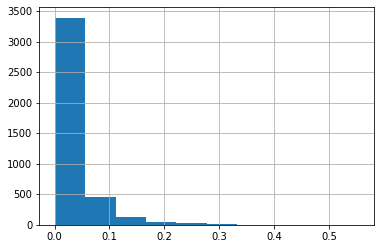

In [10]:
# 단일 아이템의 지지도 분포 
freq_sort['Support'].hist()

In [11]:
# 최소 지지도 설정 및 연관규칙 발견 
freq_items = apriori(df, min_support=0.01, use_colnames=True)
freq_items

,support,itemsets
0,0.013359,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.015793,(10 COLOUR SPACEBOY PEN)
2,0.012465,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.017630,(12 PENCIL SMALL TUBE WOODLAND)
4,0.017978,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
1849,0.011025,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSP..."
1850,0.011174,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU..."
1851,0.010280,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU..."
1852,0.010181,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA..."


In [12]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.021255,0.048669,0.013756,0.647196,13.297902,0.012722,2.696488
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.021255,0.052195,0.014501,0.682243,13.071023,0.013392,2.982798
2,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.022100,0.048669,0.013558,0.613483,12.605201,0.012482,2.461292
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052195,0.048669,0.031784,0.608944,12.511932,0.029244,2.432722
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048669,0.052195,0.031784,0.653061,12.511932,0.029244,2.731908
...,...,...,...,...,...,...,...,...,...
493,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...","(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...",0.016190,0.022646,0.010131,0.625767,27.632548,0.009764,2.611618
494,"(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...","(CHARLOTTE BAG PINK POLKADOT, RED RETROSPOT CH...",0.015048,0.025924,0.010131,0.673267,25.971094,0.009741,2.981264
495,"(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...","(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",0.016687,0.018822,0.010131,0.607143,32.257067,0.009817,2.497544
496,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...","(CHARLOTTE BAG SUKI DESIGN, CHARLOTTE BAG PINK...",0.016240,0.020362,0.010131,0.623853,30.638801,0.009800,2.604405


In [13]:
rules = rules[rules['lift'] > 1]
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
194,"(SUKI SHOULDER BAG, JAM MAKING SET PRINTED)",(DOTCOM POSTAGE),0.010826,0.035161,0.010379,0.958716,27.266522,0.009999,23.370547
241,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.010578,0.011919,0.010081,0.953052,79.961033,0.009955,21.046126
404,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...",(REGENCY TEA PLATE GREEN ),0.013359,0.018921,0.012664,0.947955,50.099816,0.012411,18.850726
243,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010677,0.011770,0.010081,0.944186,80.219959,0.009956,17.705788
56,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011770,0.011919,0.010975,0.932489,78.235865,0.010835,14.635951
...,...,...,...,...,...,...,...,...,...
254,"(JUMBO BAG APPLES, JUMBO BAG ALPHABET)",(JUMBO BAG RED RETROSPOT),0.019418,0.103894,0.011671,0.601023,5.784990,0.009653,2.246010
373,"(LUNCH BAG PINK POLKADOT, LUNCH BAG WOODLAND)",(LUNCH BAG CARS BLUE),0.019666,0.057112,0.011820,0.601010,10.523426,0.010696,2.363189
81,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM ),0.021653,0.016289,0.013012,0.600917,36.890468,0.012659,2.464930
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.038886,0.052195,0.023341,0.600255,11.500231,0.021312,2.371026


In [14]:
# 조건부에 'HERB MARKER THYME'가 있는 규칙
rules[rules.antecedents.apply(lambda x: 'HERB MARKER THYME' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(HERB MARKER THYME),(HERB MARKER BASIL),0.011770,0.012018,0.010429,0.886076,73.727377,0.010288,8.672284
50,(HERB MARKER THYME),(HERB MARKER MINT),0.011770,0.011919,0.010230,0.869198,72.925738,0.010090,7.554039
54,(HERB MARKER THYME),(HERB MARKER PARSLEY),0.011770,0.011820,0.010578,0.898734,76.037443,0.010439,9.758281
56,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011770,0.011919,0.010975,0.932489,78.235865,0.010835,14.635951
241,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.010578,0.011919,0.010081,0.953052,79.961033,0.009955,21.046126
242,"(HERB MARKER THYME, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY),0.010975,0.011820,0.010081,0.918552,77.714134,0.009952,12.132659
244,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",0.011770,0.010677,0.010081,0.856540,80.219959,0.009956,6.896161


In [15]:
# 결론부에 'HERB MARKER THYME'가 있는 규칙
rules[rules.consequents.apply(lambda x: 'HERB MARKER THYME' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(HERB MARKER BASIL),(HERB MARKER THYME),0.012018,0.011770,0.010429,0.867769,73.727377,0.010288,7.473490
51,(HERB MARKER MINT),(HERB MARKER THYME),0.011919,0.011770,0.010230,0.858333,72.925738,0.010090,6.975741
55,(HERB MARKER PARSLEY),(HERB MARKER THYME),0.011820,0.011770,0.010578,0.894958,76.037443,0.010439,9.407950
57,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011919,0.011770,0.010975,0.920833,78.235865,0.010835,12.482906
243,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010677,0.011770,0.010081,0.944186,80.219959,0.009956,17.705788
245,(HERB MARKER PARSLEY),"(HERB MARKER THYME, HERB MARKER ROSEMARY)",0.011820,0.010975,0.010081,0.852941,77.714134,0.009952,6.725368
246,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER PARSLEY)",0.011919,0.010578,0.010081,0.845833,79.961033,0.009955,6.417872
